# Partial Differential Equations_2

<font  face=Times color=darkblue size=3> In this notebook, we are gonna show some computational methods to solve several cases of partial differential equations

## Neutron Diffusion

<font  face=Times color=darkblue size=3>  As an example, we consider the diffusion of neutrons from the chain reaction in Uranium. We describe the neutrons by a simple diffusion equation $$\frac{\partial}{\partial t}n(t,\vec x)=D\Delta n(t,\vec x)+Cn(t,\vec x)$$ where $n(t,\vec x)$ is the neutron density, $D$ is the diffusion constant and $C$ is the effective creation rate for neutrons. We consider a $2-$dimensional block of length $L$ and volume $V=L^d$ with Dirichlet boundary conditions, $$n(\partial V)=0$$, so that neutrons reaching the surface leave the block. Then, one can show that there is a critical length $$L_c=\pi\sqrt{\frac{dD}{C}}.$$ If $L < L_c$, the flux of neutrons at the boundary will damp out the neutron density. However, if $L>L_c$, then the neutron density will increase exponentially, with dramatic consequences. <br><br> To study numerically, we set $N_x=N_y=N$ lattice points in each direction, a spatial lattice spacing $h=\frac{L}{N-1}$, and use the FTCS scheme with $\tau=(\frac{h^2}{2dD})/5$ (remember the stability analysis $\tau_d=\frac{h^2}{2dD}$ and $\tau \le \tau_d$). 

<font  face=Times color=darkblue size=3> Furthermore, we choose units such that $C=D=1$.<br> As the initial configuration, we consider a discrete central peak in the neutron concentration (taking N odd):$$n(i,j)=\begin{cases} 1/h^2,&  {\rm if}\ i=j=(N-1)/2 \\  0,& {\rm else}\end{cases}$$ where $0\leq i,j\leq N-1$. Let's start.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import animation
from matplotlib import cm
d=2
print('Lc=',np.pi*np.sqrt(2))

Lc= 4.442882938158366


In [ ]:
# L<Lc
L=2
N=31
h=L/(N-1)
d=2
tau=(h**2/(2*d))/5
nt=4000 

In [ ]:
#initial
ndensity=np.zeros((nt,N+2,N+2)) #including the boundaries
ndensity[:,int((N-1)/2)+1,int((N-1)/2)+1]=1/(h**2)

In [ ]:
# diffusion
for i in range(1,nt):
    for j in range(1,N-2):
        for k in range(1,N-2):
            ind_up=j+1
            ind_down=j-1
            ind_left=k-1
            ind_right=k+1
            ndensity[i,j,k]=tau*(ndensity[i-1,ind_up,k]+ndensity[i-1,ind_down,k]+ndensity[i-1,j,ind_left]+ndensity[i-1,j,ind_right]
                                 -4*ndensity[i-1,j,k])/(h**2)+(1+tau)*ndensity[i-1,j,k]

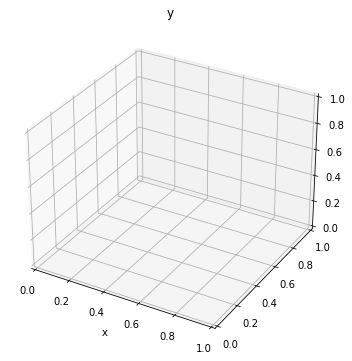

In [ ]:
from matplotlib import rc
from matplotlib import animation
fig=plt.figure(figsize=(12,6))
ax1 =fig.gca(projection='3d') 
ax1.set_xlabel('x')
ax1.set_title('y')

xx=np.arange(0,N+2)
yy=np.arange(0,N+2)
xx,yy=np.meshgrid(xx, yy)

def animate1(i):
    ax1.clear()
    z1=ndensity[i*20]
    ax1.plot_surface(xx,yy,z1, rstride=2, cstride=2, cmap=cm.coolwarm)
    return ax1,
#anim1 = animation.FuncAnimation(fig,animate1, frames=200, interval=150, blit=False)
#rc('animation', html='jshtml')
#anim1


<font  face=Times color=darkblue size=3> Here, we can see when $L<L_c$, the flux of neutrons at the boundary will damp out the neutron density.
Next, we try larger $L$ $(L>L_c)$ and see the exponential increase of density.

In [ ]:
# L>Lc
L=6
N=31
h=L/(N-1)
d=2
tau=(h**2/(2*d))/5
nt=4000 
#initial
ndensity=np.zeros((nt,N+2,N+2)) #including the boundaries
ndensity[:,int((N-1)/2)+1,int((N-1)/2)+1]=1/(h**2)
# diffusion
for i in range(1,nt):
    for j in range(1,N-2):
        for k in range(1,N-2):
            ind_up=j+1
            ind_down=j-1
            ind_left=k-1
            ind_right=k+1
            ndensity[i,j,k]=tau*(ndensity[i-1,ind_up,k]+ndensity[i-1,ind_down,k]+ndensity[i-1,j,ind_left]+ndensity[i-1,j,ind_right]
                                 -4*ndensity[i-1,j,k])/(h**2)+(1+tau)*ndensity[i-1,j,k]

fig2=plt.figure(figsize=(12,6))
ax2 =fig.gca(projection='3d') 
ax2.set_xlabel('x')
ax2.set_title('y')

xx=np.arange(0,N+2)
yy=np.arange(0,N+2)
xx,yy=np.meshgrid(xx, yy)

#def animate12(i):
#    ax2.clear()
#    z2=ndensity[i*20]
#    ax2.plot_surface(xx,yy,z2, rstride=2, cstride=2, cmap=cm.coolwarm)
#    return ax1,
#anim12 = animation.FuncAnimation(fig,animate12, frames=200, interval=150, blit=False)
#rc('animation', html='jshtml')
#anim12

<Figure size 864x432 with 0 Axes>

## Traffic Light Simulation

### Background Introduction

<font  face=Times color=darkblue size=3>  We characterize the traffic density by $\rho(t,x)$, denoting the number of vehicles per unit length at time $t$ and the position $x$ along the road. Furthermote, the flow of the traffic is charaterized by the flux $F(t,x)$, $$F(t,x)=F(\rho(t,x))=v(\rho)\rho=v_{max}(1-\frac{\rho}{\rho_{max}})\rho$$ The equation of continuity:$$\frac{\partial \rho}{\partial t}=-\frac{\partial F(t,x)}{\partial x}$$ We now simulate vehicles at a traffic light. We consider a road with periodic boundary conditions, and with a traffic light. At $t< 0$, the light is red and the vehicles wait for the light to turn green at $t=0$. Then, the vehicles start moving. Denoting the circumference of the ring-shaped road by $L$, with the traffic light located at $x=0$, we assume the initial traffic density at $t=0$:

$$    \rho(t=0,x)=\rho_0(x)= \begin{cases}\rho_{max}, 0<x<\frac{2L}{3}\\ 0,else \end{cases} 
$$

<font  face=Times color=darkblue size=3> We set $L=400\,m$, $v_{\max}=33 \, m/s$, $h=1 \, m$, $\tau=h/v_{\max}=1/33 \, s$, and we set the density scale by putting $\rho_{\max}=1$.

### Simulation Using Lax Method

<font  face=Times color=darkblue size=3> To solve this, we use Lax Method for advection equation $$\frac{\partial \rho}{\partial t}=-\frac{\partial F(\rho)}{\partial x}=-\frac{d F(\rho)}{d\rho}\frac{\partial \rho}{\partial x}=-\frac{d(\rho v(\rho))}{d\rho}\frac{\partial \rho}{\partial x}=-c(\rho)\frac{\partial \rho}{\partial x}.$$
    <br>$$\rho(n+1,r)=\frac{1}{2}(\rho(n,r+1)+\rho(n,r-1))-\frac{c(\rho)\tau}{2h}(\rho(n,r+1)-\rho(n,r-1))$$ and here the density wave in the vehicle density $c(\rho)=v_{\max}(1-\frac{2\rho}{\rho_{max}}).$

In [14]:

# set parameters given above
n=1000 #t=n*tau
L=400
h=1
v_max=33
rho_max=1
tau=h/v_max

In [15]:
rho_list=np.zeros((n,int(L/h)+1))  #build list of rho

#initial condition
#for i in range(int(L/4),int(L/2)):
for i in range(0,int(L*2/3)):
    rho_list[0,i]=rho_max*0.5
t_list=[0]

In [16]:
x_list=np.arange(0,401)

In [17]:
for i in range(1,n):
    t_list.append(i)
    for j in range(int(L/h)+1):
        j_plus1=j+1
        j_minus1=j-1
        c=v_max*(1-2*rho_list[i-1,j]/rho_max)
        #periodic boundary
        if j_plus1>int(L/h):
            j_plus1=0
        if j_minus1<0:
            j_minus1=int(L/h)
        rho_list[i,j]=0.5*(rho_list[i-1,j_plus1]+rho_list[i-1,j_minus1])-(0.5*c*tau/h)*(rho_list[i-1,j_plus1]-rho_list[i-1,j_minus1])

### Using Leap Frog
<font  face=Times color=darkblue size=3> Leap frog Method for advection equation $$\frac{\partial \rho}{\partial t}=-\frac{\partial F(\rho)}{\partial x}=-\frac{d F(\rho)}{d\rho}\frac{\partial \rho}{\partial x}=-\frac{d(\rho v(\rho))}{d\rho}\frac{\partial \rho}{\partial x}=-c(\rho)\frac{\partial \rho}{\partial x}.$$
    <br>$$\rho(n+1,r)=\rho(n-1,r)-\frac{c(\rho)\tau}{h}(\rho(n,r+1)-\rho(n,r-1))$$ and here the density wave in the vehicle density $c(\rho)=v_{\max}(1-\frac{2\rho}{\rho_{max}}).$

In [18]:
# set parameters given above
n=20000 #t=n*tau
L=400
h=1
v_max=33
rho_max=1
tau=0.05*h/(v_max) #using a smaller tau for higher stability 

rho_f=np.zeros((n,int(L/h)+1))  #build list of rho

#initial condition
#for i in range(int(L/4),int(L/2)):
for i in range(0,int(L*2/3)):
    rho_f[0,i]=rho_max*0.5
t_list=[0]
x_list=np.arange(0,401)

# do 1 step using lax method 
i=1
t_list.append(i)
for j in range(int(L/h)+1):
    j_plus1=j+1
    j_minus1=j-1
    c=v_max*(1-2*rho_f[i-1,j]/rho_max)
    #periodic boundary
    if j_plus1>int(L/h):
        j_plus1=0
    if j_minus1<0:
        j_minus1=int(L/h)
    rho_f[i,j]=0.5*(rho_f[i-1,j_plus1]+rho_f[i-1,j_minus1])-(0.5*c*tau/h)*(rho_f[i-1,j_plus1]-rho_f[i-1,j_minus1])

#now use leap frog 

for i in range(2,n):
    t_list.append(i)
    for j in range(int(L/h)+1):
        j_plus1=j+1
        j_minus1=j-1
        c=v_max*(1-2*rho_f[i-1,j]/rho_max)
        #periodic boundary
        if j_plus1>int(L/h):
            j_plus1=0
        if j_minus1<0:
            j_minus1=int(L/h)
        rho_f[i,j]=rho_f[i-2,j]-(c*tau/h)*(rho_f[i-1,j_plus1]-rho_f[i-1,j_minus1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in double_scalars


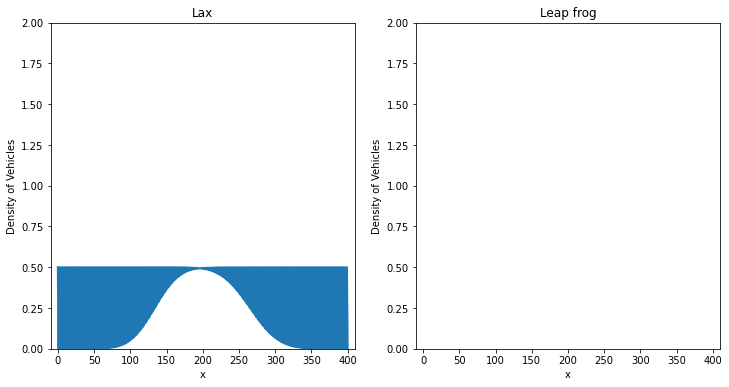

In [19]:
from matplotlib import rc
from matplotlib import animation
fig=plt.figure(figsize=(12,6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
line1, = ax1.plot([], [], lw=2)
line2, = ax2.plot([], [], lw=2)
ax1.set_xlabel('x')
ax1.set_ylabel('Density of Vehicles')
ax1.set_title('Lax')
ax2.set_xlabel('x')
ax2.set_ylabel('Density of Vehicles')
ax2.set_title('Leap frog')
ax1.set_xlim(-10,410)
ax2.set_xlim(-10,410)
ax1.set_ylim(0,2)
ax2.set_ylim(0,2)

def animate(i):
    xx=x_list
    yy=rho_list[i*10]
    xx1=x_list
    yy1=rho_f[i*200]
    line1.set_data(xx, yy)
    line2.set_data(xx1,yy1)
    return (line1,line2)
anim = animation.FuncAnimation(fig, animate, frames=100, interval=300, blit=True)
rc('animation', html='jshtml')
anim

<font  face=Times color=darkblue size=3> Since no extra vehicles added to this period-boundary road, the total number of vehicles is constant. From the figures above, we can see the discontinuity of the initial configuration leads to a shockfront, a discontinuity in the traffic density, which propagates through the system.

## Simulation of Tsunami Waves

### Shallow-Water Equations

<font  face=Times color=darkblue size=3>Soving the hydrodynamic equations to describe the dynamics of tsunami waves is quite complicated, so we derive the so call shallow-water equations and then solve numerically. The figure of two-dimensional ocean is shown below.
    <img src="https://github.com/hylu666/hku-physics4150/blob/main/Solving_Differential_Equations/shallow-water.jpeg?raw=1" width="60%">

<font  face=Times color=darkblue size=3> The two-dimensional shallow-water equations can be written as: $$ \frac{\partial}{\partial t} \begin{pmatrix} h\\ \overline{u} \end{pmatrix}=-\frac{\partial}{\partial x}\begin{pmatrix}(h-b)\overline{u}\\ \frac{1}{2}\overline{u}^2+gh \end{pmatrix}$$ in terms of water surface $h(t,x)$, and the averaged horizontal flow velocity $\bar{u}(tmx)$.  $b(x)$ describes the ocean floor.
    <br><br>We take the ocean extend from $-x_0$ to $+x_0$, with a parabolic ocean floor,
    $$b(x)=b_0(\frac{x^2}{x_0^2}-1).$$
    As boundary conditions, we set $h(t,x=\pm x_0)=0, \ \bar{u}(t,x=\rm x_0)=0.$
    <br>We consider an initial static perturbation of Gaussian form $h(t=0,x)=h_0e^{-x^2/D^2}, \ \bar{u}(t=0,x)=0$ generated by underwater earthquake.
    <br><br> In our simulation, we took the following values, where the last colum denotes the value in units of 100 m and 1 s:
    \begin{equation}
    \begin{aligned}
    \\& b_0\quad =\quad 1km \quad \ \ \doteq \quad 10
    \\& x_0\quad =\quad 10km \quad \doteq \quad 100
    \\& h_0\quad =\quad 1m \qquad \doteq \quad 0.01
    \\& D\quad \ =\quad 1km \ \ \quad \doteq \quad 10
    \\& g\quad \ \ =\quad 10m/s^2  \ \ \ \doteq \quad 0.1
    \\& h\quad \ \ =\quad 100m \  \quad \doteq \quad 1
    \\& \tau \quad \ \  =\quad 0.3s \ \ \  \quad \doteq \quad 0.3
    \end{aligned}
    \end{equation}

### Leap-Frog Method Simulation

<font  face=Times color=darkblue size=3> General form of leap-frog method for $$\frac{\partial u}{\partial t}=-\frac{\partial F(u)}{\partial x}$$ is $$u(n+1,r)=u(n-1,r)-\frac{\tau}{h}(F(n,r+1)-F(n,r-1)).$$ The scheme is not self-starting, so that (only) for the first step, from $n=0$ to $n=1$, we have to resigh other schemes, such as Lax method.

In [ ]:
# set parameters

b0=10
x0=100
h0=0.1 # here one can make the earthquake stronger
D=10
g=0.1
h=0.1 # here one can play with finer space resolution
tau=0.03 # here one can play with finer time resoluation 

nt=2000

In [ ]:
# build arrays

b_list=np.zeros(int(2*x0/h+1))
h_list=np.zeros((nt,int(2*x0/h+1)))
u_list=np.zeros((nt,int(2*x0/h+1)))

In [ ]:
# use the boundary and initial conditions

for i in range(int(2*x0/h+1)):
    b_list[i]=b0*(np.power(i-x0,2)/np.power(x0,2)-1)

for i in range(nt):
    h_list[i,0]=0   #although it is already 0, just show the complete progress
    h_list[i,-1]=0
    u_list[i,0]=0
    u_list[i,-1]=0
    
for i in range(int(2*x0/h+1)):
    h_list[0,i]=h0*np.exp(-np.power(i-x0,2)/np.power(D,2))
    u_list[0,i]=0 #although it is already 0, just show the complete progress

In [ ]:
# for the first step, use Lax Method which is introduced before
for i in range(1,int(2*x0/h)):
    F_h_plus1=(h_list[0,i+1]-b_list[i+1])*u_list[0,i+1]
    F_h_minus1=(h_list[0,i-1]-b_list[i-1])*u_list[0,i-1]
    F_u_plus1=0.5*np.power(u_list[0,i+1],2)+g*h_list[0,i+1]
    F_u_minus1=0.5*np.power(u_list[0,i-1],2)+g*h_list[0,i-1]
    u_list[1,i]=0.5*(u_list[0,i+1]+u_list[0,i-1])-(0.5*tau/h)*(F_u_plus1-F_u_minus1)
    h_list[1,i]=0.5*(h_list[0,i+1]+h_list[0,i-1])-(0.5*tau/h)*(F_h_plus1-F_h_minus1)

In [ ]:
#for the rest steps use leap-frog method
for i in range(2,nt):
    for j in range(1,int(2*x0/h)):
        F_h_plus1=(h_list[i-1,j+1]-b_list[j+1])*u_list[i-1,j+1]
        F_h_minus1=(h_list[i-1,j-1]-b_list[j-1])*u_list[i-1,j-1]
        F_u_plus1=0.5*np.power(u_list[i-1,j+1],2)+g*h_list[i-1,j+1]
        F_u_minus1=0.5*np.power(u_list[i-1,j-1],2)+g*h_list[i-1,j-1]
        h_list[i,j]=h_list[i-2,j]-(tau/h)*(F_h_plus1-F_h_minus1)
        u_list[i,j]=u_list[i-2,j]-(tau/h)*(F_u_plus1-F_u_minus1)

<ipython-input-18-4a7486ae2194>:4: RuntimeWarning: overflow encountered in double_scalars
  F_h_plus1=(h_list[i-1,j+1]-b_list[j+1])*u_list[i-1,j+1]
<ipython-input-18-4a7486ae2194>:6: RuntimeWarning: overflow encountered in power
  F_u_plus1=0.5*np.power(u_list[i-1,j+1],2)+g*h_list[i-1,j+1]
<ipython-input-18-4a7486ae2194>:5: RuntimeWarning: overflow encountered in double_scalars
  F_h_minus1=(h_list[i-1,j-1]-b_list[j-1])*u_list[i-1,j-1]
<ipython-input-18-4a7486ae2194>:7: RuntimeWarning: overflow encountered in power
  F_u_minus1=0.5*np.power(u_list[i-1,j-1],2)+g*h_list[i-1,j-1]
<ipython-input-18-4a7486ae2194>:8: RuntimeWarning: invalid value encountered in double_scalars
  h_list[i,j]=h_list[i-2,j]-(tau/h)*(F_h_plus1-F_h_minus1)
<ipython-input-18-4a7486ae2194>:9: RuntimeWarning: invalid value encountered in double_scalars
  u_list[i,j]=u_list[i-2,j]-(tau/h)*(F_u_plus1-F_u_minus1)
<ipython-input-18-4a7486ae2194>:6: RuntimeWarning: invalid value encountered in double_scalars
  F_u_plus1=0

In [ ]:
x_list=[]
for i in range(int(2*x0/h+1)):
    x_list.append(int(i-x0))
t_list=[]
for i in range(nt):
    t_list.append(i*tau)
    

(-0.2, 0.2)

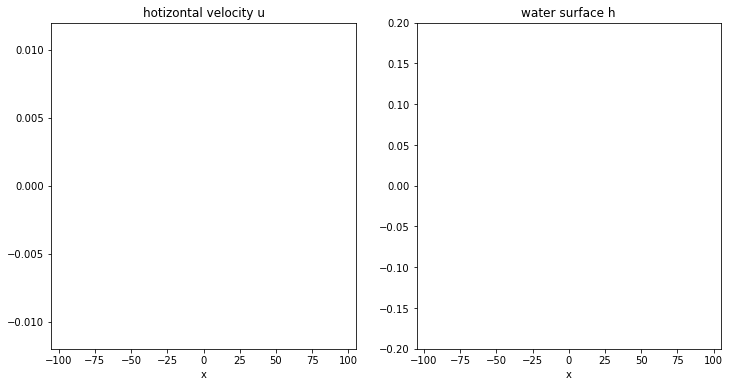

In [ ]:
from matplotlib import rc
from matplotlib import animation
fig=plt.figure(figsize=(12,6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
line3, = ax1.plot([], [], lw=2)
line4, = ax2.plot([], [], lw=2)
ax1.set_xlabel('x')
ax1.set_title('hotizontal velocity u')
ax2.set_xlabel('x')
ax2.set_title('water surface h')
ax1.set_xlim(-105,105)
ax2.set_xlim(-105,105)
ax1.set_ylim(-0.012,0.012)
ax2.set_ylim(-0.2,0.2)
#def animate1(i):
#    xx=x_list
#    yy=u_list[i*2]
#    yy2=h_list[i*2]
#    line3.set_data(xx, yy)
    #ax1.set_ylim(-np.abs(np.max(yy)),np.abs(np.max(yy)))
#    line4.set_data(xx,yy2)
#    return (line3,line4)
#anim1 = animation.FuncAnimation(fig,animate1, frames=240, interval=150, blit=True)
#rc('animation', html='jshtml')
#anim1

<font  face=Times color=darkblue size=3> Thus, we have showed the numerical solution of shallow-water equations.

<font  face=Times color=darkblue size=4> 